# 密度聚类（Density-Based Clustering, DBSCAN）详解

密度聚类是一种**基于样本密度**的无监督学习算法，可以识别**任意形状的簇**，并且能够自然识别噪声点。

最具代表性的算法是 **DBSCAN（Density-Based Spatial Clustering of Applications with Noise）**。

---

## 一、核心思想

**高密度区域**被视为簇，不同簇由低密度区域分隔。
DBSCAN通过以下两个参数定义密度：

- **$\varepsilon$ (Epsilon, 半径邻域)**：指定点的邻域范围。
- **MinPts (最小样本数)**：在半径$\varepsilon$内，形成核心点的最小样本数量。

---

## 二、关键定义

1. **$\varepsilon$邻域（Epsilon Neighborhood）**：
   给定点 $p$，其$\varepsilon$邻域为：
   $$
   N_\varepsilon(p) = \{ q \in D \mid \text{dist}(p,q) \leq \varepsilon \}
   $$

2. **核心点（Core Point）**：
   如果 $|N_\varepsilon(p)| \geq \text{MinPts}$，则 $p$为核心点。

3. **直接密度可达（Directly Density-Reachable）**：
   点$q$在$p$的$\varepsilon$邻域内，且$p$是核心点，则$q$直接密度可达$p$。

4. **密度可达（Density-Reachable）**：
   存在一个点序列 $p_1, p_2, \ldots, p_n$，满足：
   - $p_1 = p$
   - $p_n = q$
   - $\forall i: p_{i+1}$直接密度可达$p_i$

5. **密度相连（Density-Connected）**：
   存在点$o$，使得$p$和$q$都密度可达$o$。

6. **噪声点（Noise）**：
   不属于任何簇的点。

---

## 三、算法流程

**DBSCAN的主要步骤：**

1. 从任意一个未访问过的点$p$开始：
   - 如果$p$是核心点：
     - 创建新簇。
     - 递归扩展所有密度可达的点。
   - 如果$p$不是核心点：
     - 将$p$标记为噪声（之后也可能被其他点归入簇）。
2. 重复以上过程，直到所有点都被标记（簇或噪声）。

---

## 四、优缺点

### 优点：
- 能发现任意形状的簇；
- 对噪声鲁棒；
- 不需要提前指定簇的数量。

### 缺点：
- 对参数$\varepsilon$和MinPts较为敏感；
- 高维数据中距离度量失效（维度灾难）；
- 不适用于簇密度差异较大的数据。

---

## 五、DBSCAN与其他聚类方法比较

| 特性               | DBSCAN                   | K-Means                | 层次聚类             |
|--------------------|--------------------------|------------------------|----------------------|
| 簇形状             | 任意形状                 | 仅适合球状             | 任意形状             |
| 噪声识别           | 可识别噪声               | 无法识别               | 部分可识别           |
| 聚类数量           | 自动推断                 | 必须指定               | 可通过剪枝确定       |
| 对参数敏感性       | 高                       | 中等                   | 中等                 |
| 计算复杂度         | 中等（$O(n \log n)$）    | 低                     | 高                   |

---

## 六、Python 示例（使用Scikit-learn）

```python
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 生成数据
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# DBSCAN聚类
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# 绘图
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', s=30)
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
```

---

## 七、参数选择技巧

1. **MinPts**：
   - 通常 ≥ 维数 + 1；
   - 常用默认值：4或5。

2. **$\varepsilon$**：
   - 可使用**k距离图（k-distance graph）**辅助选择：
     - 对每个点计算到其第k近邻的距离；
     - 按距离升序排序；
     - 选取“拐点”处作为$\varepsilon$。

---

## 八、总结

DBSCAN是密度聚类中最具代表性的算法，适用于发现复杂形状簇并自动识别噪声。对于密度均匀、低维数据聚类任务，DBSCAN往往表现优越。

---

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io
import numpy as np
from sklearn.cluster import DBSCAN

In [5]:
def loaddata():
    data = np.loadtxt("data/cluster_data.csv",delimiter=",")
    return  data
X = loaddata()

In [6]:
model = DBSCAN(eps=0.5, min_samples=5,metric='euclidean')
model.fit(X)
labels = model.labels_
labels

array([ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2, -1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

<function matplotlib.pyplot.show(close=None, block=None)>

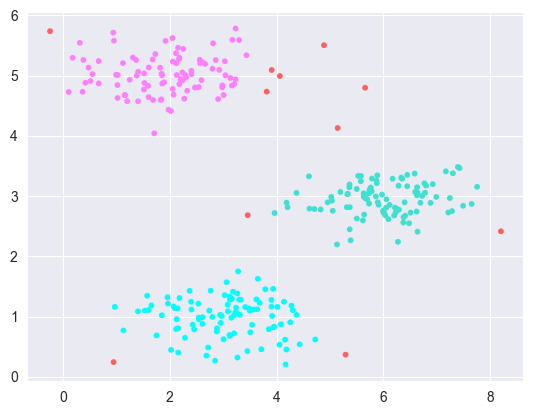

In [7]:
cm_dark = mpl.colors.ListedColormap(['#ff6060', '#ff80ff', '#9afeff', '#40e0d0', '#00ffff'])
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=10, cmap=cm_dark)
plt.show